In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import random
from scipy.stats import norm
import concurrent.futures
from run_experiments import * 
import matplotlib.pyplot as plt

# Question 1

In [2]:
# init parameters, same for question 1 and 2
m = 2000
d = 2000
s = d/100
iterations = 100*d

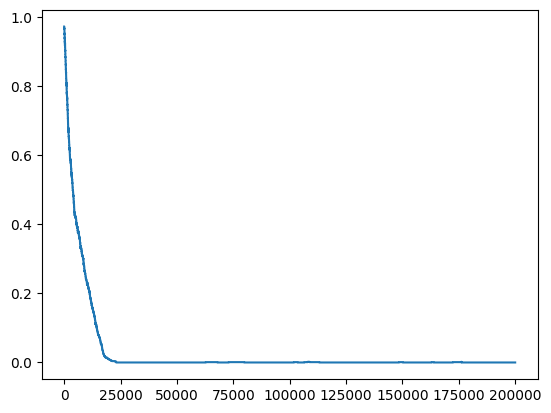

In [4]:
# check everything is working 
beta = 10
run_exp = RunExperiment(beta, m, d, s)
plt.plot(run_exp.get_sampling_losses(iterations))

In [42]:
# start by running by repeating only once (just to get a general idea), then for fine-graining increase
best_beta = 0
best_loss = math.inf
best_iterations = math.inf

for beta in [3, 5, 10, 20, 50, 100]: 
    print('beta=', beta)
    loss, n_iterations = run_multiple_experiments(10, beta, m, d, s, fixed_ones=False, sign=False, iterations = iterations)

    if loss <= best_loss and n_iterations <= best_iterations: 
        best_beta = beta
        best_loss = loss
        best_iterations = n_iterations

print('beta=', best_beta, 'n_iterations=',best_iterations, best_loss)

beta= 10
beta= 20
beta= 30
beta= 50
beta= 80
beta= 100
beta= 200
beta= 500
beta= 1000
beta= 10 n_iterations= 39986.2 0.0


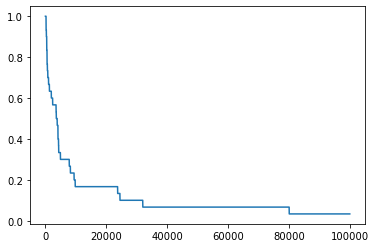

In [62]:
run_exp = RunExperiment(5, m, d, s, fixed_ones=True)
res = run_exp.get_sampling_losses(100000, change_beta_every= 5000, update_beta=lambda x : x * 1.4)
plt.plot(res, label = 'beta=100')

In [74]:
# start by running by repeating only once (just to get a general idea), then for fine-graining increase
# searching for best beta and simulation technique
best_mse = math.inf
best_n_iterations = math.inf
best_params = None

repeat_experiment_n = 1
for beta_start in [0.01, 0.05, 0.1, 0.5, 1, 5, 10]: 
    for increse_every in [2, 5, 10, 100, 1000, 1500, 2000, 3000]: 
        for multiplicative_increase in [1.00001,1.0001, 1.0005, 1.001, 1.01, 1.1, 1.2, 1.3]:
            mse, required_iterations = run_multiple_experiments(5, beta, m, d, s, fixed_ones=False, sign=False, iterations = iterations, change_beta_every= increse_every, update_beta=lambda x : x * multiplicative_increase)
            # mse, required_iterations = run_multiple_experiments(repeat_experiment_n, get_simulation_annealing_losses, iterations, beta_start, m, d, increse_every, lambda x : x * multiplicative_increase)
            if mse <= best_mse and required_iterations <= best_n_iterations: 
                best_mse = mse
                best_n_iterations = required_iterations
                best_params_and_scores = {'beta_start': beta_start, 'increase_every': increse_every, 'multiplicative_increase' : multiplicative_increase}
                print(best_params_and_scores, 'required_iterations', required_iterations)

print(best_mse, best_n_iterations)
print(best_params_and_scores)

{'beta_start': 0.01, 'increase_every': 2, 'multiplicative_increase': 1.00001} required_iterations 40314.2


/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:86: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self.beta * (new_noise - old_noise))
/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:86: RuntimeWarning: overflow encountered in double_scalars
  comp = np.exp(-self.beta * (new_noise - old_noise))


{'beta_start': 0.01, 'increase_every': 10, 'multiplicative_increase': 1.00001} required_iterations 36663.0
{'beta_start': 1, 'increase_every': 2, 'multiplicative_increase': 1.00001} required_iterations 36555.8
{'beta_start': 10, 'increase_every': 1500, 'multiplicative_increase': 1.00001} required_iterations 36404.2
0.0 36404.2
{'beta_start': 10, 'increase_every': 1500, 'multiplicative_increase': 1.00001}


running MC for m=200
[0.9430000000000001, 0.913, 0.928, 0.869, 0.885, 0.911, 0.9390000000000001, 0.907, 0.867, 0.896, 0.887, 0.9440000000000001, 0.918, 0.872, 0.866]
running MC for m=400
[0.784, 0.777, 0.845, 0.8180000000000001, 0.8140000000000001, 0.757, 0.787, 0.795, 0.795, 0.79, 0.788, 0.801, 0.835, 0.801, 0.798]
running MC for m=600
[0.678, 0.722, 0.683, 0.677, 0.724, 0.726, 0.765, 0.71, 0.724, 0.716, 0.6930000000000001, 0.756, 0.673, 0.68, 0.729]
running MC for m=800
[0.61, 0.616, 0.609, 0.619, 0.646, 0.583, 0.632, 0.611, 0.62, 0.646, 0.581, 0.602, 0.656, 0.581, 0.621]
running MC for m=1000
[0.551, 0.466, 0.47000000000000003, 0.464, 0.527, 0.549, 0.493, 0.515, 0.487, 0.488, 0.442, 0.498, 0.524, 0.494, 0.499]
running MC for m=1200
[0.364, 0.29, 0.387, 0.359, 0.304, 0.34800000000000003, 0.468, 0.433, 0.332, 0.372, 0.426, 0.432, 0.34, 0.362, 0.381]
running MC for m=1400
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
running MC for m=1600
[0.0, 0.0, 0.0, 0

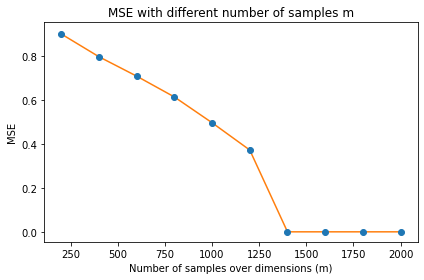

In [10]:
losses_with_different_m = []
m_values = np.arange(200 , 2200, 200)

for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)
    print(f'running MC for m={m_value}')
    beta =  10
    increase_every = 1500
    multiplicative_increase =  1.00001
    beta, mse, n_iterations = run_multiple_experiments(15, beta, m_value, d, s, fixed_ones=False, sign=False, iterations = iterations
                                                 , change_beta_every= increase_every, update_beta=lambda x : x * multiplicative_increase)
    
    print(mse)
    losses_with_different_m.append(mse)

# Plot confidence intervals as error bars
plt.errorbar(m_values, np.array(losses_with_different_m).mean(axis = 1), 
             yerr= np.array(losses_with_different_m).std(axis = 1) / np.sqrt(15), fmt='o', label='Confidence Intervals')


plt.plot(m_values, np.array(losses_with_different_m).mean(axis = 1)) # always changes
plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('img/q1_ex6_minimum_m_to_recover.jpg')


# Question 2

/home/stefano/Documents/EPFL/projects/MC_project/run_experiments.py:89: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self.beta * (new_noise - old_noise))


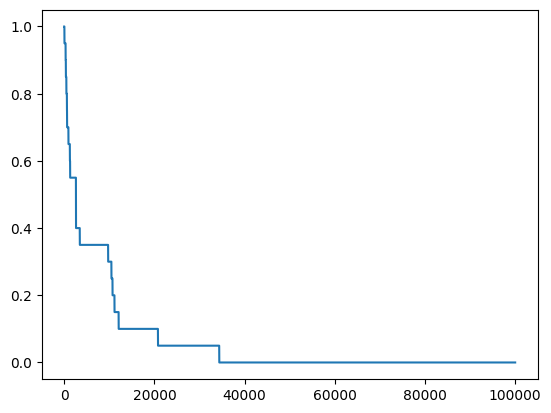

In [5]:
run_exp = RunExperiment(1000, m, d, s, fixed_ones=True)

plt.plot(run_exp.get_sampling_losses(100000), label = 'beta=100')

In [ ]:
# start by running by repeating only once (just to get a general idea), then for fine-graining increase
best_beta = 0
best_loss = math.inf
best_iterations = math.inf

for beta in [10, 20, 30, 50, 80, 100, 200, 500, 1000]: 
    print('beta=', beta)
    loss, n_iterations = run_multiple_experiments(10, beta, m, d, s, fixed_ones=True, sign=False, iterations = iterations)

    if loss <= best_loss and n_iterations <= best_iterations: 
        best_beta = beta
        best_loss = loss
        best_iterations = n_iterations

print('beta=', best_beta, 'n_iterations=',best_iterations, best_loss)

In [ ]:
best_mse = math.inf
best_n_iterations = math.inf
best_params = None

repeat_experiment_n = 1
for beta_start in [0.01, 0.05, 0.1, 0.5, 1, 5, 10]: 
    for increse_every in [2, 5, 10, 100, 1000, 1500, 2000, 3000]: 
        for multiplicative_increase in [1.00001,1.0001, 1.0005, 1.001, 1.01, 1.1, 1.2, 1.3]:
            mse, required_iterations = run_multiple_experiments(5, beta, m, d, s, fixed_ones=True, sign=False, iterations = iterations, change_beta_every= increse_every, update_beta=lambda x : x * multiplicative_increase)
            # mse, required_iterations = run_multiple_experiments(repeat_experiment_n, get_simulation_annealing_losses, iterations, beta_start, m, d, increse_every, lambda x : x * multiplicative_increase)
            if mse <= best_mse and required_iterations <= best_n_iterations: 
                best_mse = mse
                best_n_iterations = required_iterations
                best_params_and_scores = {'beta_start': beta_start, 'increase_every': increse_every, 'multiplicative_increase' : multiplicative_increase}
                print(best_params_and_scores, 'required_iterations', required_iterations)

print(best_mse, best_n_iterations)
print(best_params_and_scores)

running MC for m=50
[0.9, 0.9, 1.0, 0.8500000000000001, 0.8500000000000001, 0.9500000000000001, 1.0, 0.9, 0.7000000000000001, 1.0, 0.9500000000000001, 0.9500000000000001, 1.0, 0.9500000000000001, 0.9]
running MC for m=70
[1.0, 0.8500000000000001, 0.9, 0.8500000000000001, 0.9, 0.6000000000000001, 0.8, 0.9500000000000001, 0.8500000000000001, 0.75, 1.0, 0.9500000000000001, 1.0, 0.75, 0.9500000000000001]
running MC for m=90
[0.8, 0.8, 0.7000000000000001, 0.8, 0.75, 0.8, 0.8500000000000001, 0.6000000000000001, 0.9, 0.7000000000000001, 0.8500000000000001, 0.55, 0.8500000000000001, 0.9500000000000001, 0.9]
running MC for m=110
[0.7000000000000001, 0.55, 0.8500000000000001, 0.75, 0.45, 0.65, 0.75, 0.45, 0.6000000000000001, 0.8, 0.8, 0.75, 0.75, 0.9, 0.8]
running MC for m=130
[0.7000000000000001, 0.5, 0.30000000000000004, 0.2, 0.0, 0.1, 0.0, 0.75, 0.6000000000000001, 0.0, 0.0, 0.7000000000000001, 0.05, 0.5, 0.75]
running MC for m=150
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

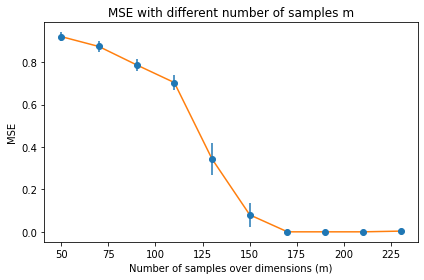

In [13]:


losses_with_different_m = []
m_values = np.arange(50 , 250, 20)

for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)
    print(f'running MC for m={m_value}')
    beta =  10

    beta, mse, n_iterations = run_multiple_experiments(15, beta, m_value, d, s, fixed_ones=True, sign=False, iterations = iterations)
    
    print(mse)
    losses_with_different_m.append(mse)

# Plot confidence intervals as error bars
plt.errorbar(m_values, np.array(losses_with_different_m).mean(axis = 1), 
             yerr= np.array(losses_with_different_m).std(axis = 1) / np.sqrt(15), fmt='o', label='Confidence Intervals')


plt.plot(m_values, np.array(losses_with_different_m).mean(axis = 1)) # always changes
plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('img/q2_ex3_minimum_m_to_recover.jpg')


# Question 3

/home/stefano/Documents/EPFL/MC/MC-project/compute_noise.py:68: RuntimeWarning: divide by zero encountered in log
  return -(np.log(alpha[self.ones_indices]).sum() + np.log(1 - alpha[self.min_one_indices]).sum())
/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:89: RuntimeWarning: invalid value encountered in double_scalars
  comp = np.exp(-self.beta * (new_noise - old_noise))


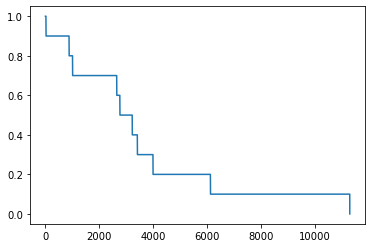

In [18]:
m3 = 2000
d3 = 1000
s3 = d3/100
#beta = 2
iterations3 = 100*d3

run_exp = RunExperiment(1, m3, d3, s3, fixed_ones=True, sign= True)

plt.plot(run_exp.get_sampling_losses(iterations3), label = 'beta=100')

In [ ]:
# start by running by repeating only once (just to get a general idea), then for fine-graining increase
best_beta = 0
best_loss = math.inf
best_iterations = math.inf

for beta in [10, 20, 30, 50, 80, 100, 200, 500, 1000]: 
    print('beta=', beta)
    loss, n_iterations = run_multiple_experiments(10, beta, m, d, s, fixed_ones=True, sign=True, iterations = iterations)

    if loss <= best_loss and n_iterations <= best_iterations: 
        best_beta = beta
        best_loss = loss
        best_iterations = n_iterations

print('beta=', best_beta, 'n_iterations=',best_iterations, best_loss)

In [ ]:
best_mse = math.inf
best_n_iterations = math.inf
best_params = None

repeat_experiment_n = 1
for beta_start in [0.01, 0.05, 0.1, 0.5, 1, 5, 10]: 
    for increse_every in [2, 5, 10, 100, 1000, 1500, 2000, 3000]: 
        for multiplicative_increase in [1.00001,1.0001, 1.0005, 1.001, 1.01, 1.1, 1.2, 1.3]:
            mse, required_iterations = run_multiple_experiments(5, beta, m, d, s, fixed_ones=True, sign=True, iterations = iterations, change_beta_every= increse_every, update_beta=lambda x : x * multiplicative_increase)
            # mse, required_iterations = run_multiple_experiments(repeat_experiment_n, get_simulation_annealing_losses, iterations, beta_start, m, d, increse_every, lambda x : x * multiplicative_increase)
            if mse <= best_mse and required_iterations <= best_n_iterations: 
                best_mse = mse
                best_n_iterations = required_iterations
                best_params_and_scores = {'beta_start': beta_start, 'increase_every': increse_every, 'multiplicative_increase' : multiplicative_increase}
                print(best_params_and_scores, 'required_iterations', required_iterations)

print(best_mse, best_n_iterations)
print(best_params_and_scores)

running MC for m=20


/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:89: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-self.beta * (new_noise - old_noise))
/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:89: RuntimeWarning: overflow encountered in double_scalars
  comp = np.exp(-self.beta * (new_noise - old_noise))
/home/stefano/Documents/EPFL/MC/MC-project/compute_noise.py:68: RuntimeWarning: divide by zero encountered in log
  return -(np.log(alpha[self.ones_indices]).sum() + np.log(1 - alpha[self.min_one_indices]).sum())


100000.0
running MC for m=40
100000.0
running MC for m=60


/home/stefano/Documents/EPFL/MC/MC-project/run_experiments.py:89: RuntimeWarning: invalid value encountered in double_scalars
  comp = np.exp(-self.beta * (new_noise - old_noise))


100000.0
running MC for m=80
100000.0
running MC for m=100
100000.0
running MC for m=120
86003.0
running MC for m=140
84175.1
running MC for m=160
86082.3
running MC for m=180
42144.6
running MC for m=200
32326.6
running MC for m=220
17238.0
running MC for m=240
19599.8


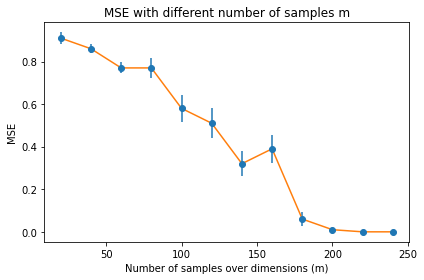

In [20]:
losses_with_different_m = []
m_values = np.arange(20 , 250, 20)

for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)
    print(f'running MC for m={m_value}')
    beta =  5
    increase_every = 1000
    multiplicative_increase =  1.01
    beta, mse, n_iterations = run_multiple_experiments(10, beta, m_value, d3, s3, fixed_ones=True, sign=True, iterations = iterations3, change_beta_every= increase_every, update_beta=multiplicative_increase)
    print(n_iterations)
    losses_with_different_m.append(mse)


plt.errorbar(m_values, np.array(losses_with_different_m).mean(axis = 1), 
             yerr= np.array(losses_with_different_m).std(axis = 1) / np.sqrt(15), fmt='o', label='Confidence Intervals')


plt.plot(m_values, np.array(losses_with_different_m).mean(axis = 1)) # always changes
plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('img/q2_ex3_minimum_m_to_recover.jpg')
